
# Project: Data Anaysis of  TMDB_Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project  be investigating the TMDB_Movies dataset. This data set contains more that 10,000 record of movies collected from The Movie Database (TMDb), It includes the columns such as imdb_id, revenue, budget, vote_count etc.
>> I start the analysis by first understanding the data set using data analysis packages like Numpy, pandas, Matplotlid. The project will contain four parts.
>    1. Data Wrangling 
>    2. Data Cleaning 
>    3. Exploratory Analysis 
>    4. Drawing Conclusion  
 
 > Question that will be answered using this data set are
    
> 1. What are the duration of movies? 
> 2. What are the profit of each Movies?
> 3. what are the successful genre related with profitable movies? 
> 4. What are the movies with the most profitable?
> 


In [4]:
# Here I will import files to begin the anlsysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After importing the neccessary packages, I will then load the data and print five rows . I will next go on to investigate the general properties of the data set like the size or shape of the dataset, the different data type and if it contains null values. 

### General Properties

In [5]:
# Load the csv files and loading it to df variable 

df = pd.read_csv('tmdb-movies .csv')
# Read the Data and print five rows 

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [24]:
# I will look at the shape of the data.
# It shows me that the dataset have 10,866 rows and 21 column

df.shape


(10866, 21)

In [25]:
#I will use the describe() method to understand basic statistical details like count, mean, std, percentile etc

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The describe method helped me understand some statistical question. I can see that the dataset contains zero values in the budget and revenue part. I assumed that this zero values are missing from the dataset. It was easy to see that the popularity value max value of 32.9 and the rest the value is between 0.2 to 0.7.  

In [26]:
# Get info for the column and null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Observation of the dataset 
   > 1. we can see that the dataset includes zerovalues 
   > 2. It is easy to understand that there are many null values like cast, homepage,genre, director,keywords
   > 3. there are colums that are not important to answer the questions like homepage and tagline
    
### Data Cleaning 

   > 1. we will remove column that are not used 
   > 2. We will get rid of duplicates 
   > 3. we will not use zero values in the budget and revenue
   > 4. We will change the released date to date format
    



In [27]:
## Removing the Column that are not used 
    # 1. column that need to be deleted or drop are id, imdb_id,popularity, budget_adj, revenue_adj, homepage,overview, production_companies, vote_count, vote_average

df.drop(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1,inplace=True)
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/2015,2015


In [29]:
## Remove Duplicates 

df.drop_duplicates(inplace=True)
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/2015,2015


In [31]:
df.shape

## This shows that the duplicates are dropped. it used to have 10866 but now it is 10865

(10865, 10)

In [34]:
## Remove the 0 value from the budget and revenue 

# we will create a list of the Budget and Revenue 

list =['budget','revenue']


## this will replace all the 0 value to NAN
df[list]= df[list].replace(0, np.NAN)

##Removing all the NAN value from the List 
df.dropna(subset = list, inplace = True)

## printing the Size of the dataset 
df.shape

##After Removing all 0 values we have 3854 numbber of bmovies. 

(3854, 10)

In [35]:
## Changing the Date Format for the Released Date

df.release_date =pd.to_datetime(df['release_date'])

## Printing the Data

df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [7]:
#checking the data type
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What is the duration of Movies?

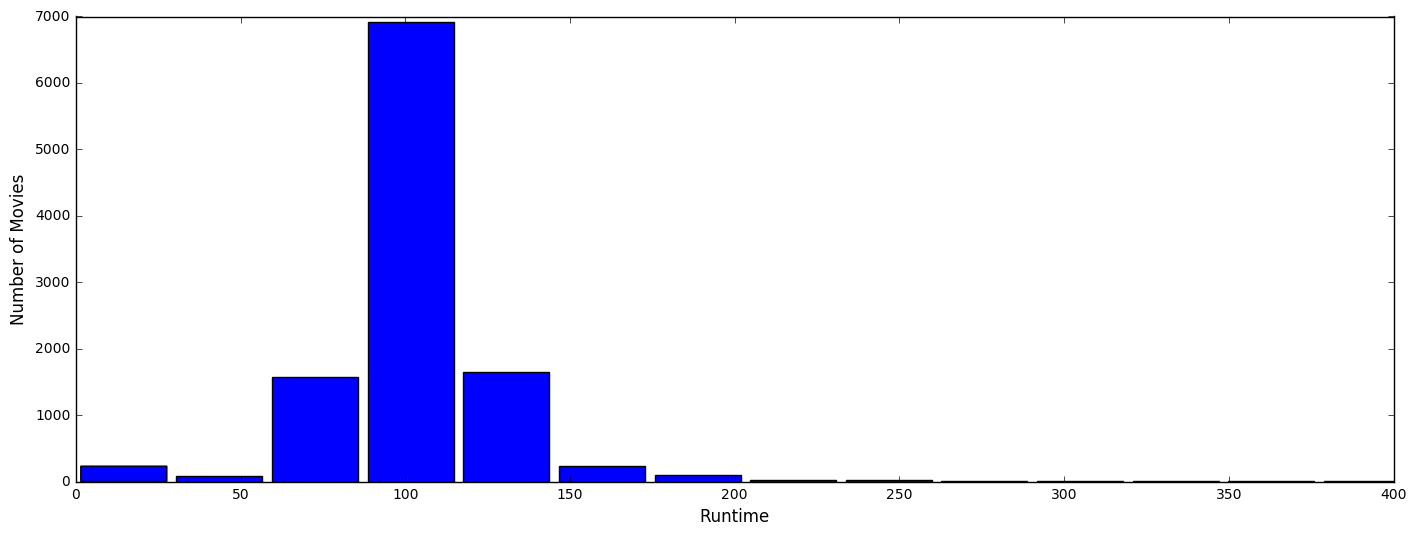

In [52]:
fig = plt.figure(figsize = (17,6),dpi = 100);

plt.hist(df['runtime'],bins = 31, rwidth = 0.9);
plt.xlabel('Runtime', fontsize = 12);
plt.ylabel('Number of Movies', font
plt.xlim(0,400);size = 12);




### Research Question 2 What is the profit of each Movie ? 

In [8]:
# we will insert parameters. These are the column in dataset, name , and value to insert )

df.insert(2,'profit_earned',df['revenue']-df['budget'])

#we will read the data again
df.head(2)



,id,imdb_id,profit_earned,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


### Research Question 2  What is the profit of a movies by released year?

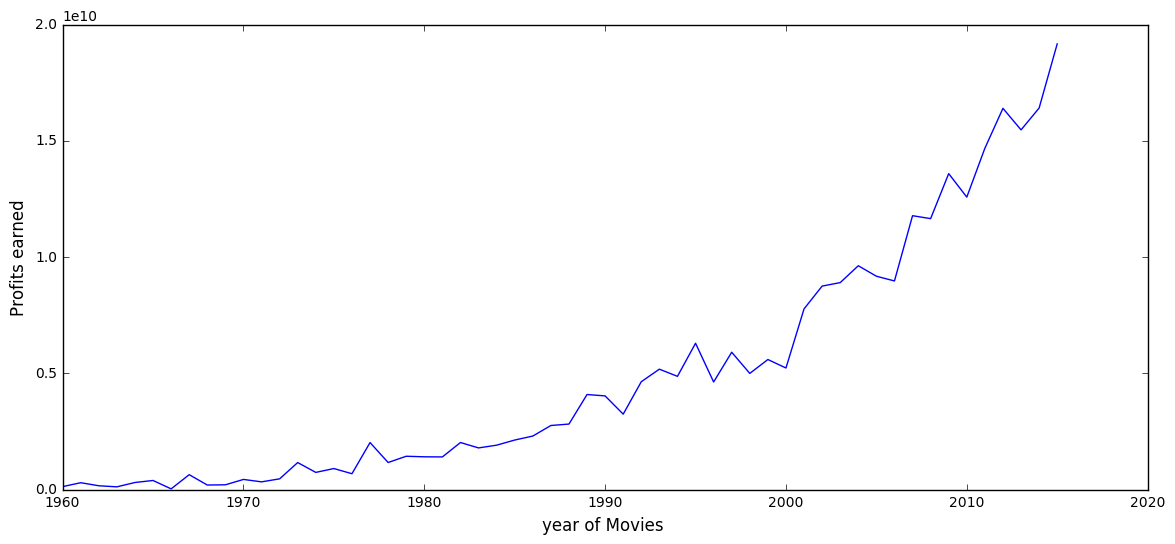

In [27]:
# In this analysis we will use the line graph to show the movies profitability by realease year 

profits_year = df.groupby('release_year')['profit_earned'].sum()

#We will figure the size by stating the width and height 
plt.figure(figsize=(14,6), dpi = 130)

#on the x axis, we will have the realease year 
plt.xlabel('year of Movies ', fontsize = 12)
#on the y axis , we will see the sum of the profit earned 
plt.ylabel('Profits earned', fontsize = 12)


#plotting the graph 
plt.plot(profits_year)

#drawing the chart 
plt.show()

# we can see that 2015 made the most profitable movies 


In [28]:
# the most profit year 
profits_year.idxmax()



2015

### Research Question 3 What is the most profitable by genres? 

In [ ]:
 # Getting all the profit that has more than 40M
profit = df[df['profit_eaned'] >= 50000000]

#collecting it 
profit.index = range(len(profit_data))

#Starting from 1
profit.index = profit_data.index + 1


In [81]:


#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [86]:
#Stores the data
count = data('genres')
#reading the first four 
count.head()

Comedy       556
Drama        521
Action       482
Thriller     420
Adventure    392
dtype: int64

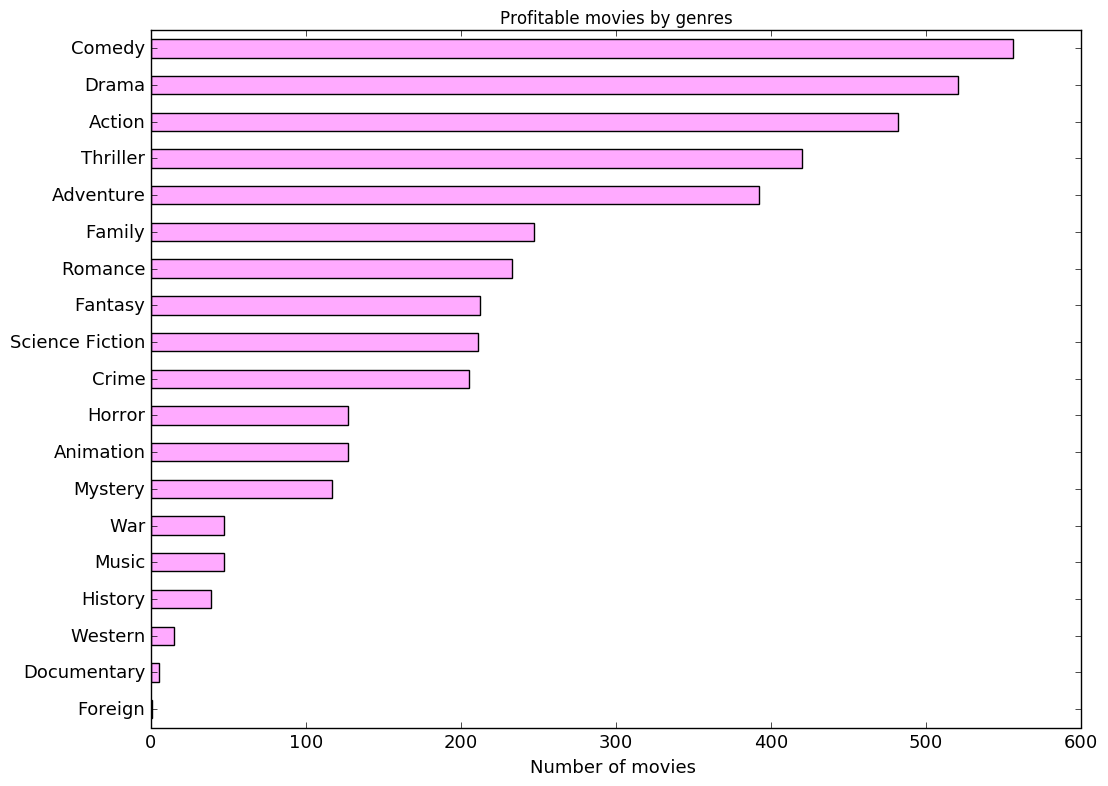

In [85]:
#we are going to plot it in the  high to low 
count.sort_values(ascending = True, inplace = True)

#plotting and setting the color 
lt = count.plot.barh(color = '#ffaaff', fontsize = 13)

#title of the graph 
lt.set(title = 'Profitable movies by genres')

# on x axis
lt.set_xlabel('Number of movies ', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#showing the graph 
plt.show()


<a id='conclusions'></a>
## Conclusion

> We the analysis I have done in this project, I can see that the average duration for a movie is between 100 - 110. 
eventhough the analysis is focused on profit of a movie, It was clear to see that comedy is the most profitable genres.
It follows that drama and action are the most profitable genres. 
we also saw that the most profitable year to relaease was recorded on 2015. 

>Even if I limited the data by selecting movies that profit is greater than 50 million, I was still able to see insightfull information. 
